In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [3]:
imre = pd.read_csv('ARISML.csv', index_col = 'ts')
luca = pd.read_csv('recording_luca.csv', index_col = 'ts')
imre.shape

(240, 27)

In [4]:
luca.shape

(15007, 27)

In [5]:
combined = pd.concat([luca,imre]).drop_duplicates().reset_index()

In [6]:
combined = combined.set_index('ts').sort_index().reset_index()
combined = combined[combined['ts'] > 0]
combined['Origin'] = 0

In [7]:
origin_imre = combined.merge(imre)['ts'].values

In [8]:
def set_origin(row):
    return 'Imre' if row['ts'] in origin_imre else 'Luca'

In [9]:
combined['Origin'] = combined.apply(set_origin, axis = 1)

In [10]:
combined['Time [s]'] = combined['ts']/1000
combined['Altitude [m]'] = combined['altitude']/1000
combined['Battery [V]'] = combined['battery_battery']/1000
combined['Pressure [kPa]'] = combined['sb_data_pressure']/1000

In [11]:
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

In [12]:
combined.set_index('ts').to_csv('maiden_launch_combined_telemetry.csv')

In [13]:
#convert to gs
fmt_acc = lambda x: x / 1024
#convert to degrees per second
fmt_gyro = lambda x: x / 16.4

combined[dim3('Acceleration')] = combined[dim3('sb_data_acc')].apply(pd.to_numeric).apply(fmt_acc)
combined[dim3('Gyro')] = combined[dim3('sb_data_gyro')].apply(pd.to_numeric).apply(fmt_gyro)

(2500, 2570)

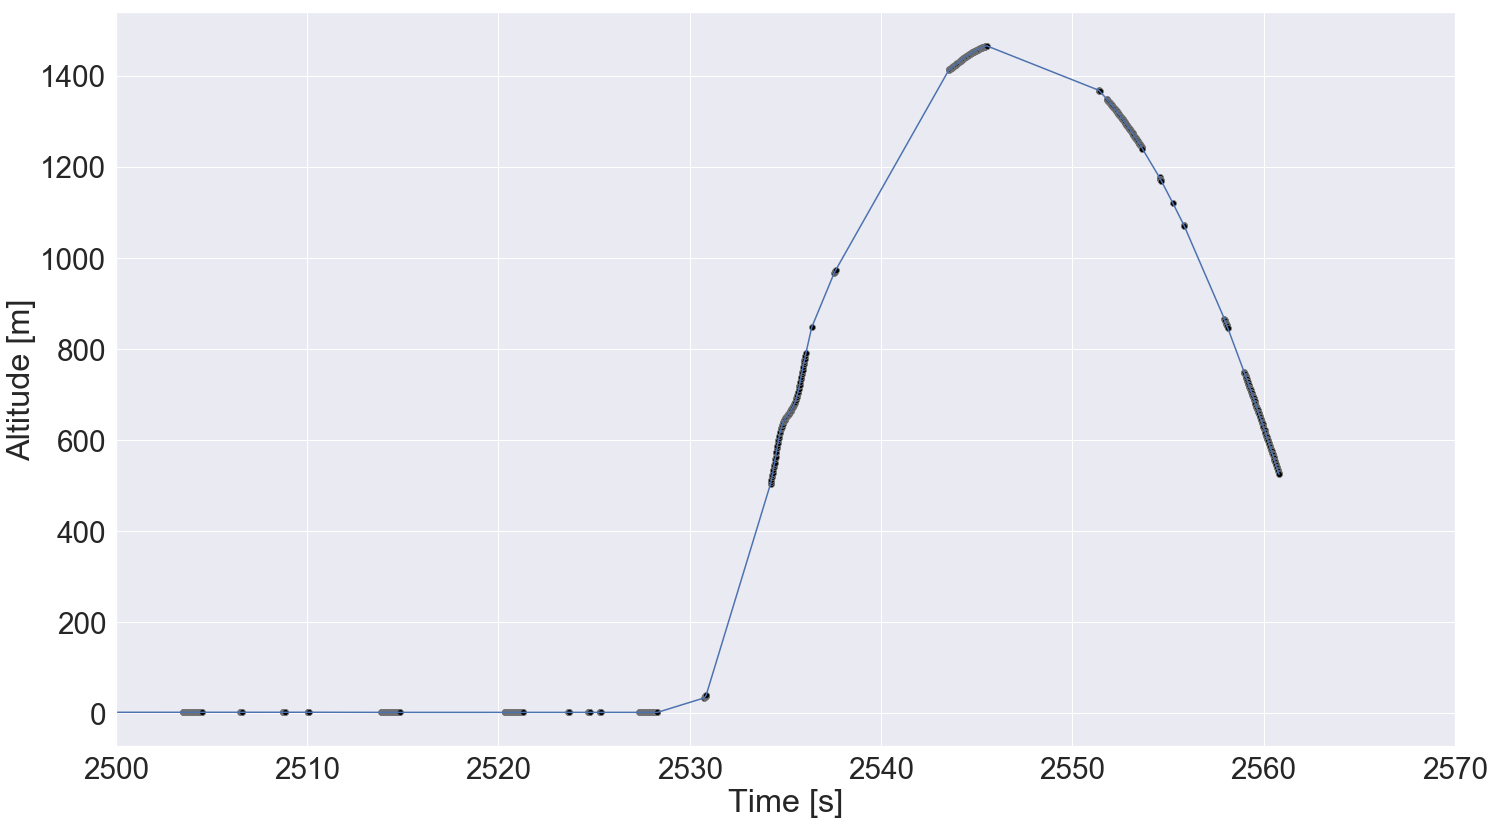

In [14]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Altitude [m]', color = 'black', edgecolor='gray')#, hue = 'Origin', s=150)
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Altitude [m]')
plt.set_ylabel('Altitude [m]')
plt.set_xlabel('Time [s]')
plt.set_xlim(2500, 2570)

(2500, 2570)

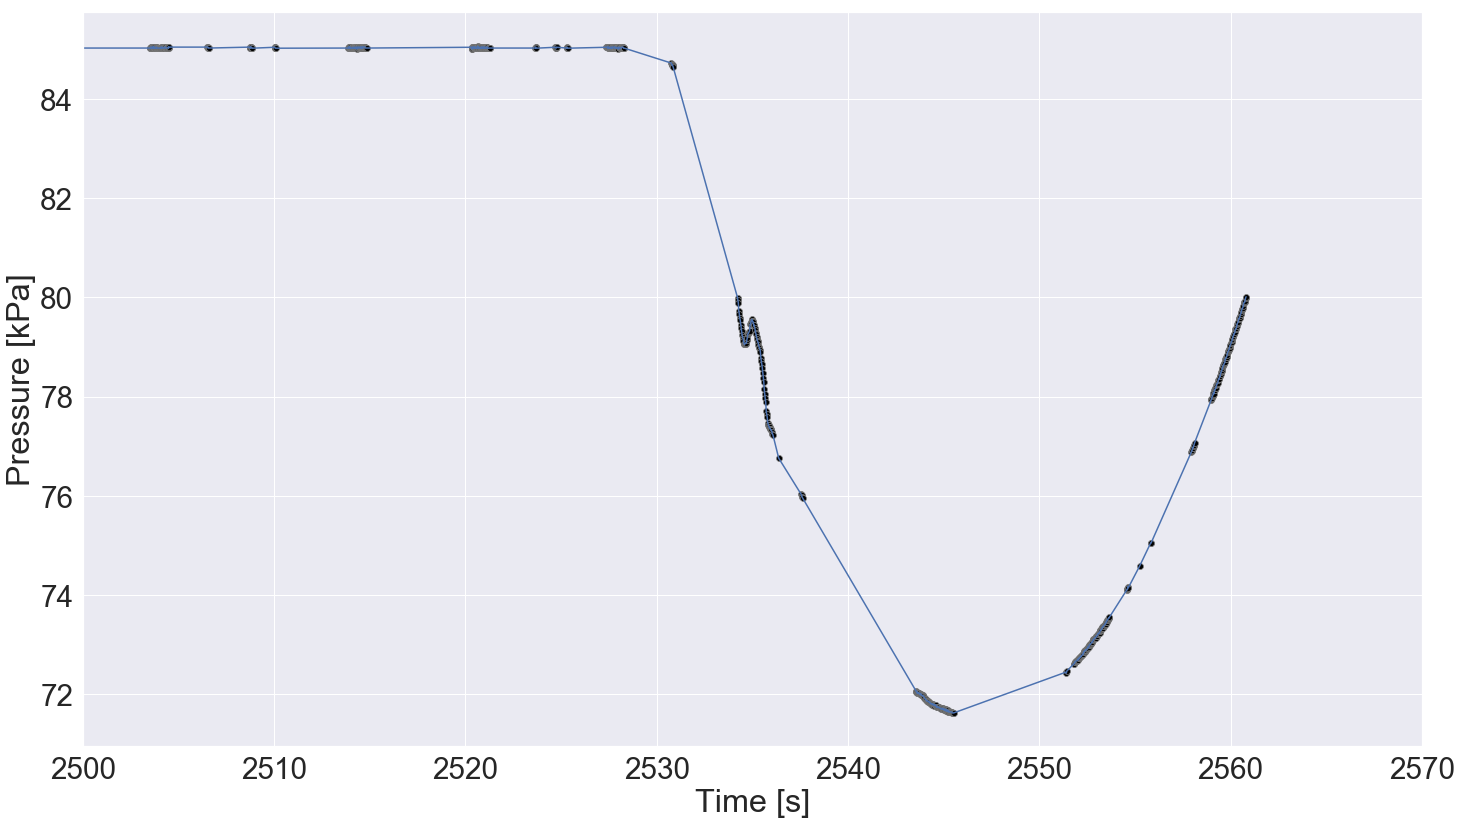

In [15]:
plt = sns.scatterplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure [kPa]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure [kPa]')
plt.set_ylabel('Pressure [kPa]')
plt.set_xlabel('Time [s]')
plt.set_xlim(2500, 2570)

(2500, 2570)

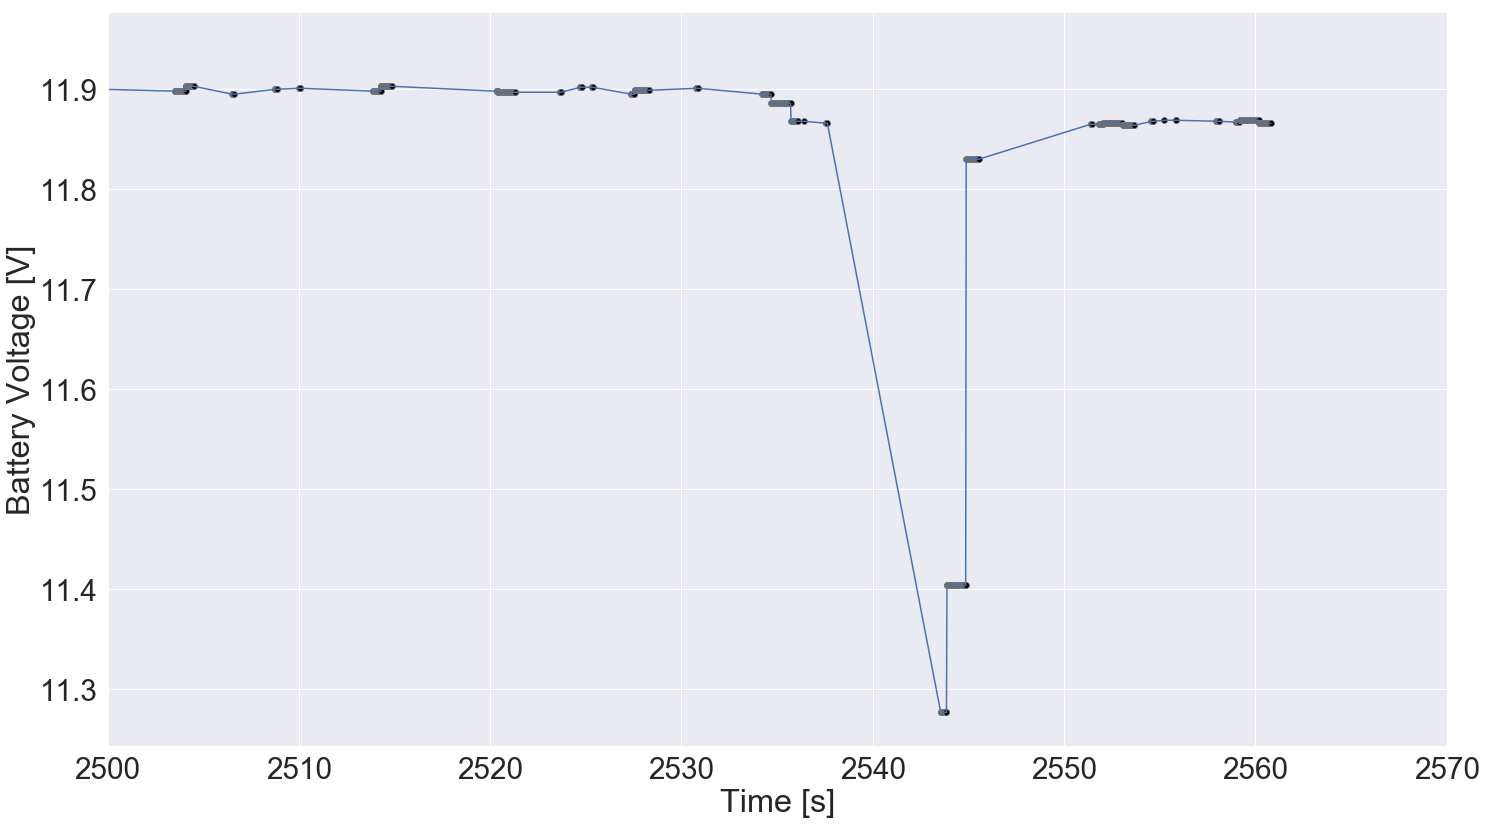

In [16]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Battery [V]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Battery [V]')
plt.set_ylabel('Battery Voltage [V]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(2500, 2570)

In [17]:
imu_log = combined.reset_index()
imu_log.index.rename('Log Entry', inplace = True)
imu_log = imu_log.reset_index()
imu_log.head()

,Log Entry,index,ts,sb_data_pressure,sb_data_temp,sb_data_gyro_x,sb_data_gyro_y,sb_data_gyro_z,sb_data_acc_x,sb_data_acc_y,...,Time [s],Altitude [m],Battery [V],Pressure [kPa],Acceleration_x,Acceleration_y,Acceleration_z,Gyro_x,Gyro_y,Gyro_z
0,0,1,1065200,85044,2972,7,-11,-17,-19,21,...,1065.2,1.515,11.941,85.044,-0.018555,0.020508,1.029297,0.216049,-0.339506,-0.524691
1,1,2,1065300,85025,2972,8,-10,-10,-18,22,...,1065.3,1.493,11.941,85.025,-0.017578,0.021484,1.031250,0.246914,-0.308642,-0.308642
2,2,3,1065400,85044,2972,9,-9,-24,-16,24,...,1065.4,1.494,11.941,85.044,-0.015625,0.023438,1.030273,0.277778,-0.277778,-0.740741
3,3,4,1065500,85025,2972,10,-10,-22,-14,20,...,1065.5,1.497,11.941,85.025,-0.013672,0.019531,1.033203,0.308642,-0.308642,-0.679012
4,4,5,1065600,85044,2972,8,-9,-17,-17,18,...,1065.6,1.477,11.941,85.044,-0.016602,0.017578,1.032227,0.246914,-0.277778,-0.524691


In [18]:
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acceleration', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
imu_log_long.head()

,,gps_lon_decimal,ts,sb_data_pressure,sb_data_gyro_x,Altitude [m],cs,velocity,gps_minute,index,gps_second,...,Origin,gps_satellite,altitude,flight_phase,Battery [V],gps_hour,sb_data_acc_x,Acceleration,Gyro,Axis
Log Entry,Axis,,,,,,,,,,,,,,,,,,,,,
0,x,757284,1065200,85044,7,1.515,31,817,58,1,18,...,Luca,12,1515,1,11.941,11,-19,-0.018555,0.216049,x
1,x,757284,1065300,85025,8,1.493,221,810,58,2,18,...,Luca,12,1493,1,11.941,11,-18,-0.017578,0.246914,x
2,x,757284,1065400,85044,9,1.494,107,813,58,3,18,...,Luca,12,1494,1,11.941,11,-16,-0.015625,0.277778,x
3,x,757284,1065500,85025,10,1.497,18,814,58,4,18,...,Luca,12,1497,1,11.941,11,-14,-0.013672,0.308642,x
4,x,757284,1065600,85044,8,1.477,182,809,58,5,18,...,Luca,12,1477,1,11.941,11,-17,-0.016602,0.246914,x


(2500, 2570)

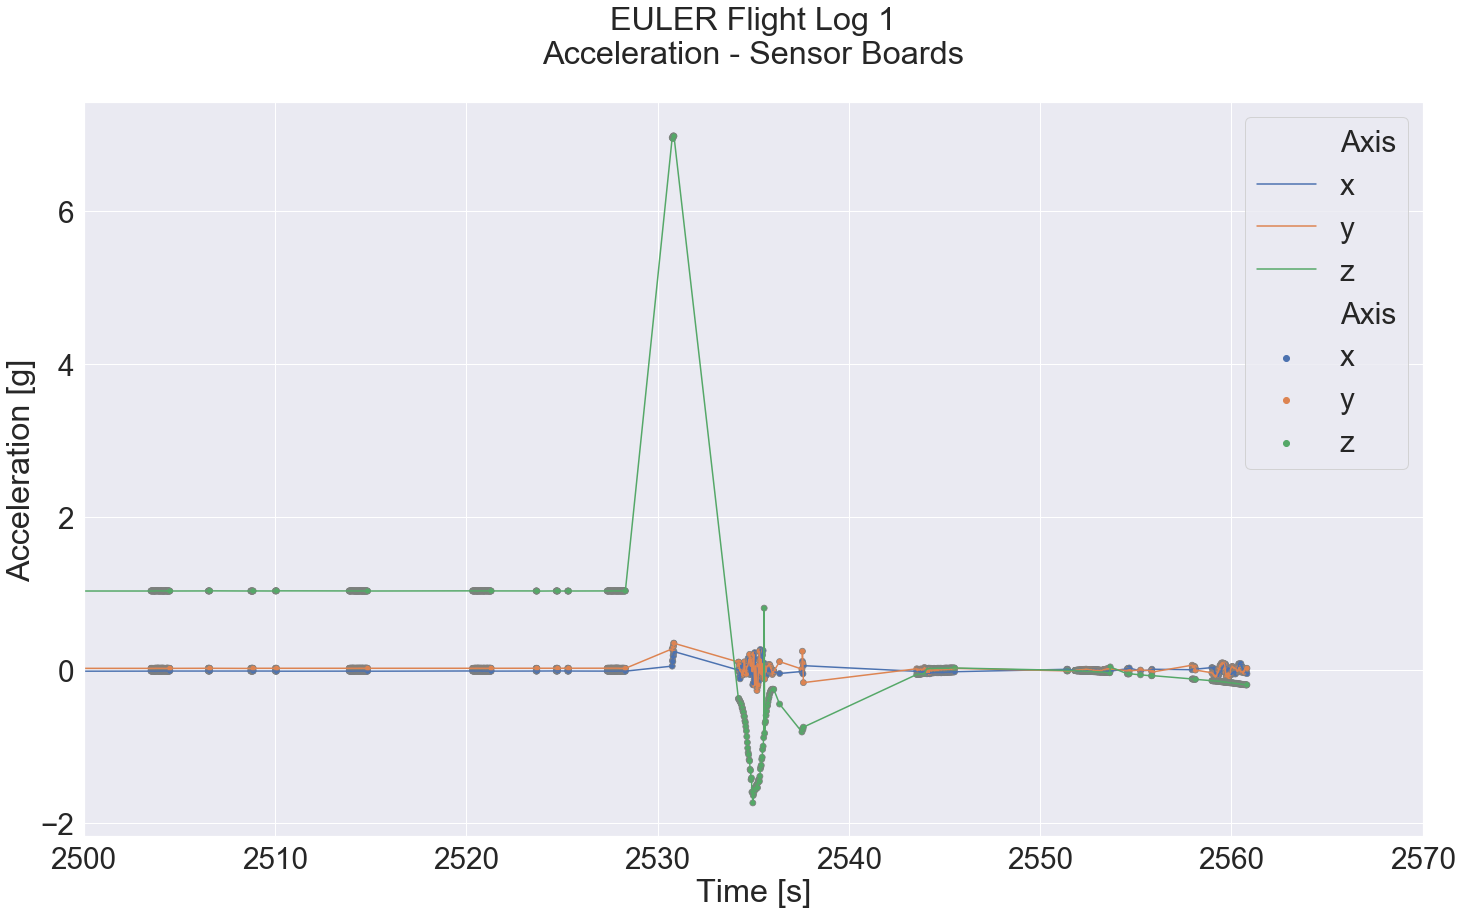

In [19]:
plt = sns.scatterplot(data = imu_log_long, x = 'Time [s]', y = 'Acceleration', hue = 'Axis', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = imu_log_long, x = 'Time [s]', y = 'Acceleration', hue = 'Axis')
plt.set_title(f'EULER Flight Log 1\nAcceleration - Sensor Boards\n')
plt.set_ylabel('Acceleration [g]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(2500, 2570)

(2500, 2570)

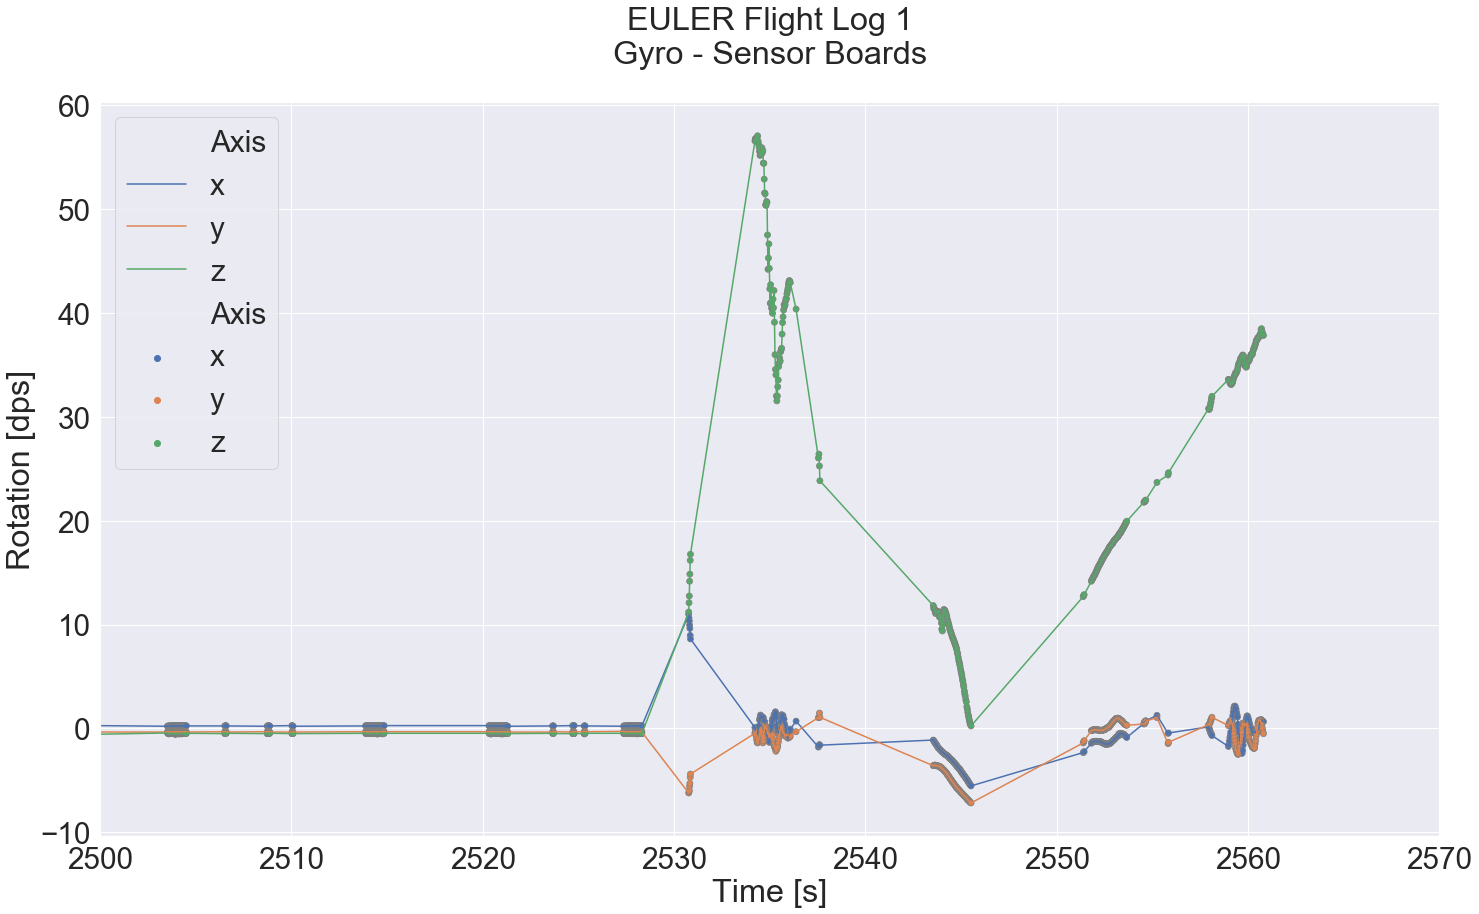

In [21]:
plt = sns.scatterplot(data = imu_log_long, x = 'Time [s]', y = 'Gyro', hue = 'Axis', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = imu_log_long, x = 'Time [s]', y = 'Gyro', hue = 'Axis')
plt.set_title(f'EULER Flight Log 1\nGyro - Sensor Boards\n')
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(2500, 2570)